In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)             # a zip object in memory
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# NOTE: you can only unzip a zipped tuple once before it is removed from the
#       computer's memory. Make sure you unzip the latitudes and longitudes
#       into the coordinates list before moving on.

In [4]:
# In a new cell, display the coordinate pairs with the following code.

# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

# When we run the cell (above, the output is ordered pairs of
# `lats` and `lngs` coordinates.

-88.8386145245999 51.355314354677006
7.360644892716039 -63.0463190559897
-24.043243321207214 104.39161678521384
-30.184973850796226 45.25474255675442
-28.57809231347168 -151.57771433374145
-0.39417001167414867 33.41421970370817
-30.002463816104388 -78.43893289839589
47.34175337647264 2.310171083362377
45.0273642697137 64.44382637230447
17.13762537097044 -156.42971374929104
-66.53240052258579 154.60982253174132
29.64468373835669 -91.91197544193096
-68.45529832510942 -50.25403396643446
-48.222441404462366 -157.2642929948472
66.11624904485453 -93.67155049099918
57.49341233859329 -122.80742145933066
13.818213789297545 148.946121895999
85.96215651293227 26.918074759187675
-66.5735447868489 73.05389578051981
61.74311593144398 16.299548752809642
80.3382352948513 121.331498195363
65.14508099869164 -150.81791663738295
-48.02736214321502 -14.12081812735093
-37.251612253794775 -14.673070498496287
-2.3219750634551986 -93.34298885664852
-73.04344593425779 13.179100077921845
-66.37400889127132 95.48

In [5]:
# Now that we have our ordered pairs of latitudes and longitudes in a list, we
# can iterate through the list of tuples and find the nearest city to those coordinates.

In [6]:
# 6.1.5 Generate Random World Cities

from citipy import citipy

# Then, in a new cell, add the following code:

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unizue, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

627

In [8]:
# 6.2.6 Get the City Weather Data
# will retrieve weather data from 500+ cities.
# Let's pseudocode to map out--high-level--how we will get the weather data for
# each city for the website.

# We will need to do the following...
# 1. Import our dependencies and initialize counters and an empty list that will
#     hold the weather data.
# 2. Loop through the cities list.
# 3. Group the cities in sets of 50 to log the process as we find the weather
#     data for each city.
#      o Two counters will be needed here:
#        - one to log the city count from 1 to 50, and
#        - another for the sets.
# 4. Build the `city_url` or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#     o City, country, and date
#     o Latitude and longitude
#     o Maximum temperature
#     o Humidity
#     o Cloudiness
#     o Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to
#     a DataFrame.

In [9]:
# Import Dependencies, and Initialize an Empty List and Counters
# "At the top of our code block, we are going to declare an empty list,
# `city_data = []`; add a print statement that references the beginning of the
# logging; and create counters for the record numbers, 1-50; and the set counter."

# Make certain to complete the following:
# . Import Requests library and the weather_api_key
# . Build the basic URL for the OpenWeatherMap with your weather_api_key added
#    to the URL.
# . as well, import the time library and the datetime module
# Dependenies
import requests
#
from config import weather_api_key
#
import time
from datetime import datetime

In [10]:
# for cell above, let's go over the code remarks...
#   - We parse the JSON file for the current city.
#      . If no weather data for the city, i.e. a `<Response [404]>` then there
#         is no weather to retrieve and `City not found. Skipping...` is printed.
#   - If there is weather data for the city, we will retrieve the latitude,
#      longitude, maximum temperature, humidity, cloudiness, wind speed, and
#      date and assign those values to variables.
#       . We could write a `try-except` block for each one of these parameters
#          to handle the KeyError if the data wasn't found, but since these
#          parameters are always present in the response this won't be necessary.
#   - We append the cities list with a dictionary for that city, where the key-
#      value pairs are th e values from our weather parameters.
#   - Finally, below the `try` block and after the `except` block, we add the
#      closing print statement, which will let us know that the data retrieval
#      has been completed. Make sure that your `except` block is indented and
#      in line with the `try` block, and that the print statements are flush
#      with the margin.
#   - Under the print statement in the `except` block, we add the `pass`
#      statement, which is a general purpose statement to handle all errors
#      encountered and to allow the program to continue.
#
# IMPORTANT: "Generally, it isn't good coding practice to add the `pass`
#             statement to the `except` block. Ideally, we want to handle or
#             catch each error as it happens and do something specific (e.g.,
#             add another `try` block or print out the error)."

In [12]:
# Now have all code to perform the API calls for each city and to parse the JSON
# data. Let's combine into one cell and run...
#

# This will be a (tremendously) long code block before first run...

# Create the base url...
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning the Data Retrieval ")
print("-----------------------------")

# Create counters (starting at one -- i.e., not an index)
record_count = 1
set_count = 1


# Loop Through the List of Cities and Build the City URL


# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    
    # Group cities in set of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1                               # increment the set count
        record_count = 1                             # reset the record count
        time.sleep(60)                               # wait a minute
        
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count (before the next city is processed)
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(
            city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that the Data Loading is complete.
print("---------------------------------")
print("Data Retrieval Complete          ")
print("---------------------------------")

Beginning the Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | ciudad bolivar
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | port victoria
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | saint-doulchard
Processing Record 9 of Set 1 | dzhusaly
City not found. Skipping...
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | new iberia
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | fort nelson
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | longyearbyen
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | bollnas
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | college
Processi

Processing Record 35 of Set 4 | russell
Processing Record 36 of Set 4 | maridi
Processing Record 37 of Set 4 | tanete
Processing Record 38 of Set 4 | pevek
Processing Record 39 of Set 4 | sorland
Processing Record 40 of Set 4 | ntcheu
Processing Record 41 of Set 4 | toliary
City not found. Skipping...
Processing Record 42 of Set 4 | goderich
Processing Record 43 of Set 4 | basco
Processing Record 44 of Set 4 | saint george
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | cuamba
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | nioro
Processing Record 49 of Set 4 | lompoc
Processing Record 50 of Set 4 | warrnambool
Processing Record 1 of Set 5 | gurdaha
Processing Record 2 of Set 5 | sterling
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | marinette
Processing Record 5 of Set 5 | atambua
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | fairbanks
Processing Record 8 of Set 5 | umzimv

Processing Record 25 of Set 8 | bafia
Processing Record 26 of Set 8 | tambura
Processing Record 27 of Set 8 | hovd
Processing Record 28 of Set 8 | karauzyak
City not found. Skipping...
Processing Record 29 of Set 8 | morro bay
Processing Record 30 of Set 8 | sao filipe
Processing Record 31 of Set 8 | san jose de guanipa
Processing Record 32 of Set 8 | mahibadhoo
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | asyut
Processing Record 35 of Set 8 | borova
Processing Record 36 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 37 of Set 8 | mar del plata
Processing Record 38 of Set 8 | dzaoudzi
Processing Record 39 of Set 8 | piacabucu
Processing Record 40 of Set 8 | golovchino
Processing Record 41 of Set 8 | carballo
Processing Record 42 of Set 8 | puerto quijarro
Processing Record 43 of Set 8 | sumbawa
City not found. Skipping...
Processing Record 44 of Set 8 | bria
Processing Record 45 of Set 8 | shache
Processing 

Processing Record 12 of Set 12 | bonfim
Processing Record 13 of Set 12 | baykit
Processing Record 14 of Set 12 | namatanai
Processing Record 15 of Set 12 | karratha
Processing Record 16 of Set 12 | riaba
City not found. Skipping...
Processing Record 17 of Set 12 | constitucion
Processing Record 18 of Set 12 | casablanca
Processing Record 19 of Set 12 | pavlogradka
Processing Record 20 of Set 12 | alyangula
Processing Record 21 of Set 12 | naraina
Processing Record 22 of Set 12 | porosozero
Processing Record 23 of Set 12 | okhotsk
Processing Record 24 of Set 12 | saint-leu
Processing Record 25 of Set 12 | souris
Processing Record 26 of Set 12 | starkville
Processing Record 27 of Set 12 | sidhi
Processing Record 28 of Set 12 | vao
Processing Record 29 of Set 12 | srednekolymsk
Processing Record 30 of Set 12 | murmashi
Processing Record 31 of Set 12 | anadyr
Processing Record 32 of Set 12 | palmer
Processing Record 33 of Set 12 | oum hadjer
Processing Record 34 of Set 12 | axim
Processing

In [ ]:
# after above error, will be copy/renaming  this file to WeatherPy (fr WeatherPy_ori)
# and rerunning from start^^^

In [ ]:
# 6.2.7 Create a DataFrame of City Weather Data

# You have the data in a list of dictionaries, which is a format that you can
# use to create a Pandas DataFrame. You will also need to export the DataFrame
# as a CSV file for Jack.

# Our next steps will entail converting t he array of dictionaries to a
# DataFrame, ensuring the columns are in the correct order, and exporting the
# DataFrame to a comma-separated (CSV) file.

# REWIND: Recall that we can convert a list of dictionaries to a Pandas
#         DataFrame using `df = pd.DataFrams(list with dictionaries)`.

# In a new cell, add the following code to convert the array of dictionaries to
# a Pandas DataFrame and run the cell.

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,60.62,70,21,6.64,ZA,2022-07-08 00:13:28
1,Ciudad Bolivar,8.1222,-63.5497,80.19,69,77,9.91,VE,2022-07-08 00:13:28
2,Carnarvon,-24.8667,113.6333,63.82,26,0,8.93,AU,2022-07-08 00:13:29
3,Mataura,-46.1927,168.8643,47.48,92,100,14.52,NZ,2022-07-08 00:13:29
4,Port Victoria,0.0939,33.9756,69.17,70,62,8.86,KE,2022-07-08 00:13:30
5,Coquimbo,-29.9533,-71.3436,53.33,100,0,8.05,CL,2022-07-08 00:13:30
6,Saint-Doulchard,47.1037,2.3520,61.18,77,0,8.55,FR,2022-07-08 00:13:30
7,Hilo,19.7297,-155.0900,90.28,86,100,6.91,US,2022-07-08 00:13:30
8,Bluff,-46.6000,168.3333,47.80,88,100,26.69,NZ,2022-07-08 00:13:31
9,New Iberia,30.0035,-91.8187,90.99,49,20,6.91,US,2022-07-08 00:08:59


In [ ]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp,
# Humidity, Cloudiness, and WindSpeed, so they are easy to read.

# REWIND: Recall that to reorder the columns, we assign a variable to an array
#         of the columns in the order we want them to appear:
#    i.e. `new_column_order = ["column2", "column4", "column1"]`
#         Then, we assign a new or the same DataFrame with new column order:
#         `df = df[new_column_order]`

# Once you reorder the columns and run the (next) cell, reprint the DataFrame

In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp",
                    "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-07-08 00:13:28,-33.5906,26.8910,60.62,70,21,6.64
1,Ciudad Bolivar,VE,2022-07-08 00:13:28,8.1222,-63.5497,80.19,69,77,9.91
2,Carnarvon,AU,2022-07-08 00:13:29,-24.8667,113.6333,63.82,26,0,8.93
3,Mataura,NZ,2022-07-08 00:13:29,-46.1927,168.8643,47.48,92,100,14.52
4,Port Victoria,KE,2022-07-08 00:13:30,0.0939,33.9756,69.17,70,62,8.86
...,...,...,...,...,...,...,...,...,...
572,Saint-Joseph,RE,2022-07-08 00:28:16,-21.3667,55.6167,62.98,73,20,9.55
573,Lodingen,NO,2022-07-08 00:28:17,68.4140,15.9951,50.14,91,100,11.36
574,Vieux-Habitants,GP,2022-07-08 00:28:17,16.0589,-61.7659,80.17,76,68,13.65
575,Ihosy,MG,2022-07-08 00:28:17,-22.4000,46.1167,54.75,91,39,7.96


In [ ]:
# Lastly, following the instructions in the cell below, we'll create an output
# file to save the DataFrame as a CSV in a new foler for that file.

# In our World_Weather_Analysis folder, create a new folder called "weather_data."
# Add the code below, run the cell, then confirm the CSV file is in your folder.

# The last line in the code block (cell below) will export the DataFrame to a
# CSV file, with the index label (or column A) header as "City_ID." If we ever
# need to export the CSV file to a DataFrame, that header will be present in the
# DataFrame. ..After running the cell below, we'll have completed our tasks for
# making API calls, parsing the response, and collecting the data for our
# project. "Before we move on to graphing and statistical analysis, let's update
# our GitHub repository." -- BUT, Before that! "We don't want the config.py file
# containing the API key to be exposed to the public on GitHub, as this would
# mean Anyone could copy and use our API key, possible causing us to incur
# charges. ..When we type `git status` in the command line, we can see all the
# files we have created so far that are untracked.

# If we only wanted to add the `WeatherPy.ipynb" file to GitHub, we could type
# `git add WeatherPy.ipynb`. HOWEVER, every time we want to add a new file or
# update current files to the repository, we have to add each file individually,
# which is time-consuming and cumbersome. Instead, we can add the files we don't
# want to track to the `.gitignore` file.

# REWIND: GitHub does not track files and extensions that are added to the
#         `.gitignore` file.

In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# 6.3.1 Plot Latitude vs. Temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time

# Get today's date in seconds.
today = time.time()
today

1657248395.6844301

In [19]:
# "The format for time appears like the datetime stamp for the JSON weather data.
# We can convert this using the string format method, `strftime()` and pass the
# formatting parameters for our date in parentheses. To get the format for today,
# we can add `%x` inside the parentheses. ..In the `API_practice` file, add
# `strftime("%x")` to the time module for our `today` variable and run the cell.
# The output will be today's date."

today = time.strftime("%x")
today

'07/07/22'

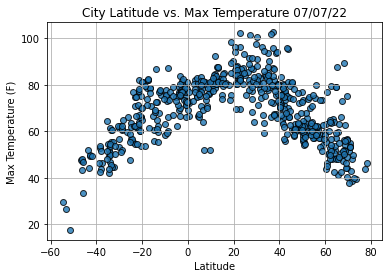

In [24]:
# Build the scatter plot for the latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# The balance of the scatter plots will share the same format. All we need to do
# is change the y-axis for each weather parameter. Let's create the scatter plots
# quickly by copying the code and changing the y-axis variable.

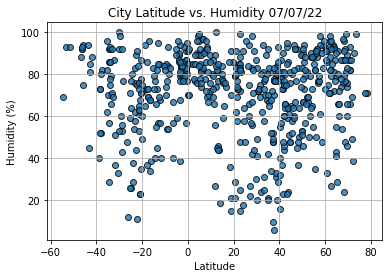

In [25]:
# 6.3.2 Plot Latitude vs. Humidity

# Build the scatter plot for the latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

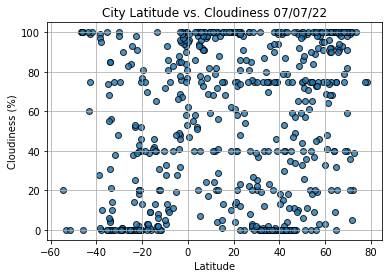

In [26]:
# 6.3.3 Plot Latitude vs. Cloudiness

# Build the scatter plot for the latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

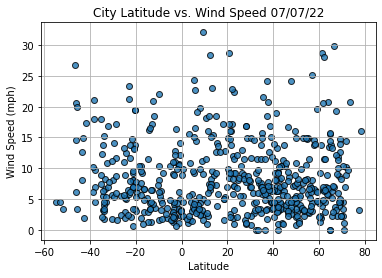

In [27]:
# 6.3.4 Plot Latitude vs. Wind Speed

# Build the scatter plot for the latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()